### This script takes in the dataframes created in _1_Dataframe-Creation.py and parses it for added and displaced functions, then creates graphs based on the parsed data

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma, lognorm, weibull_min, gaussian_kde, skew, genpareto
from matplotlib.ticker import FuncFormatter
import os

In [21]:
os.chdir('/home/anna/Documents/EcoGenoRisk_Paper_Revisions/Figures/Added and Lost')
as_all = pd.read_excel('Biome Synbio Top Match EC Comparison.xlsx')
as_all = as_all[as_all['Percentage'] > 0]
as_lost = pd.read_excel('Lost_Functions.xlsx')
as_present = pd.read_excel('Only Present Enzyme Biome Synbio Top Match EC Comparison.xlsx')
added_EC = as_all[(as_all['Synbio Presence/Absence'] == 1) & (as_all['Top Match Presence/Absence'] == 0)]

In [22]:
as_present.shape

(3285, 5)

In [37]:
as_lost
# print((as_lost[(as_lost['Percentage'] <= 20)]).shape)

,EC Number,Percentage,Name,Synbio Presence/Absence,Top Match Presence/Absence
0,3.6.4.12,99.781500,DNA helicase.,0,1
1,3.4.21.102,84.850692,C-terminal processing peptidase.,0,1
2,2.7.1.40,82.447196,pyruvate kinase.,0,1
3,2.1.1.198,82.155863,16S rRNA (cytidine(1402)-2'-O)-methyltransferase.,0,1
4,3.6.1.27,82.010197,undecaprenyl-diphosphate phosphatase.,0,1
...,...,...,...,...,...
3037,2.5.1.66,0.000000,N(2)-(2-carboxyethyl)arginine synthase.,0,1
3038,2.5.1.59,0.000000,protein geranylgeranyltransferase type I.,0,1
3039,2.5.1.58,0.000000,protein farnesyltransferase.,0,1
3040,1.3.1.88,0.000000,tRNA-dihydrouridine(16/17) synthase [NAD(P)(+)].,0,1


In [24]:
as_all

,EC Number,Percentage,Name,Synbio Presence/Absence,Top Match Presence/Absence
0,2.7.7.7,100.000000,DNA-directed DNA polymerase.,1,1
1,3.6.4.12,99.781500,DNA helicase.,0,1
2,5.2.1.8,99.781500,peptidylprolyl isomerase.,1,1
3,2.7.13.3,98.980335,histidine kinase.,1,1
4,5.6.2.4,98.397669,DNA 3'-5' helicase.,1,1
...,...,...,...,...,...
3660,2.8.2.5,0.072833,chondroitin 4-sulfotransferase.,0,0
3661,1.1.1.8,0.072833,glycerol-3-phosphate dehydrogenase (NAD(+)).,0,1
3662,1.14.16.4,0.072833,tryptophan 5-monooxygenase.,0,0
3663,4.1.1.76,0.072833,arylmalonate decarboxylase.,0,1


In [39]:
# print((added_EC[(added_EC['Percentage'] <= 5)]))
added_EC

,EC Number,Percentage,Name,Synbio Presence/Absence,Top Match Presence/Absence
3127,2.1.1.128,0.291333,(RS)-norcoclaurine 6-O-methyltransferase.,1,0


In [40]:
as_present

,EC Number,Percentage,Name,Synbio Presence/Absence,Top Match Presence/Absence
0,2.7.7.7,100.000000,DNA-directed DNA polymerase.,1,1
1,3.6.4.12,99.781500,DNA helicase.,0,1
2,5.2.1.8,99.781500,peptidylprolyl isomerase.,1,1
3,2.7.13.3,98.980335,histidine kinase.,1,1
4,5.6.2.4,98.397669,DNA 3'-5' helicase.,1,1
...,...,...,...,...,...
3280,2.5.1.66,0.000000,N(2)-(2-carboxyethyl)arginine synthase.,0,1
3281,2.5.1.59,0.000000,protein geranylgeranyltransferase type I.,0,1
3282,2.5.1.58,0.000000,protein farnesyltransferase.,0,1
3283,1.3.1.88,0.000000,tRNA-dihydrouridine(16/17) synthase [NAD(P)(+)].,0,1


#### Entire Biome Functional Space

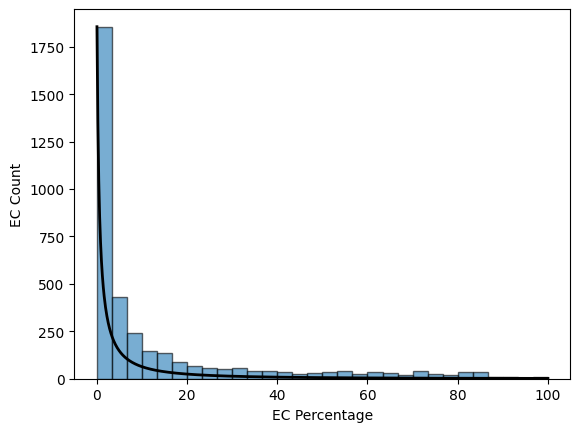

In [26]:

data = np.array(as_all['Percentage'])


counts, bins, _ = plt.hist(data, bins=30, alpha=0.6, edgecolor = 'black')

# Fit a lognormal distribution to the data
shape, loc, scale = lognorm.fit(data, floc=0)

# Generate points on the x-axis
x = np.linspace(min(data), max(data), 1000)

# Calculate the lognormal PDF
pdf = lognorm.pdf(x, shape, loc, scale)

# Scale the PDF to match the histogram
pdf_scaled = pdf * (counts.max() / pdf.max())

# Plot the scaled lognormal PDF
plt.plot(x, pdf_scaled, 'black', lw=2)

plt.xlabel('EC Percentage')
plt.ylabel('EC Count')
plt.show()


In [27]:
mean = lognorm.mean(shape, loc=loc, scale=scale)
median = lognorm.median(shape, loc=loc, scale=scale)
variance = lognorm.var(shape, loc=loc, scale=scale)
skewness = lognorm.stats(shape, loc=loc, scale=scale, moments='s')  # Skewness
kurtosis = lognorm.stats(shape, loc=loc, scale=scale, moments='k')  # Kurtosis

print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"Median: {median}")

Mean: 22.861965080256105
Variance: 28959.975849113413
Skewness: 434.76698204916585
Kurtosis: 10492622.280316086
Median: 3.04399468910012


### Present and Lost Functions

Text(0, 0.5, 'EC Count')

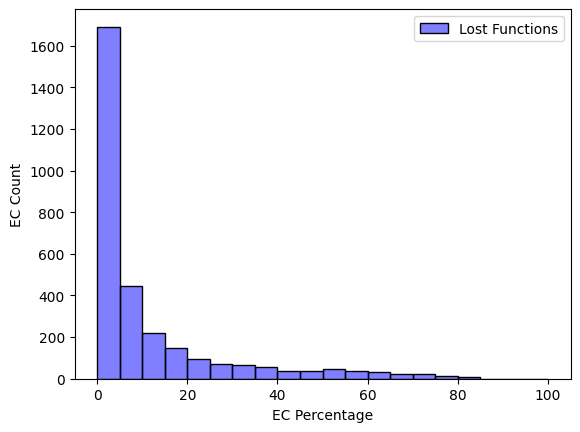

In [36]:


bin_edges = range(0, 101, 5)  # Example: bins from 0 to 100 with a step of 5

# sns.histplot(x='Percentage', bins = bin_edges, data = as_present, color='black', label = 'Present Functions', alpha = 0.6)
sns.histplot(x='Percentage',bins=bin_edges, data = as_lost, color = 'blue', label='Lost Functions', alpha = 0.5)

plt.legend()
plt.xlabel('EC Percentage')
plt.ylabel('EC Count')



Text(0, 0.5, 'EC Count')

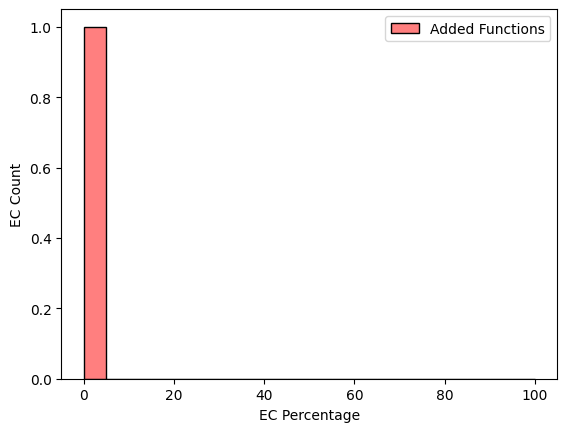

In [35]:
# sns.histplot(x='Percentage',bins=bin_edges, data = added_EC, color = 'black', label='Added Functions', kde= True, alpha = 0.6)
# sns.histplot(x='Percentage', bins = bin_edges, data = as_present, color='black', label = 'Present Functions', alpha = 0.6)
sns.histplot(x='Percentage',bins=bin_edges, data = added_EC, color = 'red', label='Added Functions', alpha = 0.5)
plt.legend()
plt.xlabel('EC Percentage')
plt.ylabel('EC Count')
# plt.legend(['Present Functions', 'Added Functions'])
# Get current handles and labels




In [30]:
as_present

,EC Number,Percentage,Name,Synbio Presence/Absence,Top Match Presence/Absence
0,2.7.7.7,100.000000,DNA-directed DNA polymerase.,1,1
1,3.6.4.12,99.781500,DNA helicase.,0,1
2,5.2.1.8,99.781500,peptidylprolyl isomerase.,1,1
3,2.7.13.3,98.980335,histidine kinase.,1,1
4,5.6.2.4,98.397669,DNA 3'-5' helicase.,1,1
...,...,...,...,...,...
3280,2.5.1.66,0.000000,N(2)-(2-carboxyethyl)arginine synthase.,0,1
3281,2.5.1.59,0.000000,protein geranylgeranyltransferase type I.,0,1
3282,2.5.1.58,0.000000,protein farnesyltransferase.,0,1
3283,1.3.1.88,0.000000,tRNA-dihydrouridine(16/17) synthase [NAD(P)(+)].,0,1


In [31]:
as_lost

,EC Number,Percentage,Name,Synbio Presence/Absence,Top Match Presence/Absence
0,3.6.4.12,99.781500,DNA helicase.,0,1
1,3.4.21.102,84.850692,C-terminal processing peptidase.,0,1
2,2.7.1.40,82.447196,pyruvate kinase.,0,1
3,2.1.1.198,82.155863,16S rRNA (cytidine(1402)-2'-O)-methyltransferase.,0,1
4,3.6.1.27,82.010197,undecaprenyl-diphosphate phosphatase.,0,1
...,...,...,...,...,...
3037,2.5.1.66,0.000000,N(2)-(2-carboxyethyl)arginine synthase.,0,1
3038,2.5.1.59,0.000000,protein geranylgeranyltransferase type I.,0,1
3039,2.5.1.58,0.000000,protein farnesyltransferase.,0,1
3040,1.3.1.88,0.000000,tRNA-dihydrouridine(16/17) synthase [NAD(P)(+)].,0,1


In [32]:
present_array = np.array(as_present['Percentage'])
lost_array = np.array(as_lost['Percentage'])
shape2, loc2, scale2 = lognorm.fit(present_array, floc = 0)
shape3, loc3, scale3 = lognorm.fit(lost_array, floc = 0)

FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'lognorm' requires that 0.0 < (x - loc)/scale  < inf for each x in `data`.

In [ ]:
x2 = np.linspace(min(present_array), max(present_array), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
x3 = np.linspace(min(lost_array), max(lost_array), 100) 

kde2 = gaussian_kde(present_array)
density2 = kde2(x2)
# wb_fit = weibull_min.fit(present_array)
kde3 = gaussian_kde(lost_array)
density3 = kde3(x3)

# plt.hist(present_array, density=True, alpha = 0.6, edgecolor = 'black')
# plt.plot(x2, weibull_min.pdf(x2, *wb_fit), 'b-', lw=2, label="Weibull fit")

mean = np.sum(x2 * density2) / np.sum(density2)
print('Present Mean Based on Gaussian KDE is:', mean)
variance = np.sum((x2 - mean) ** 2 * density2) / np.sum(density2)
print('Present Variance Based on Gaussian KDE is:', variance)

mean = np.sum(x3 * density3) / np.sum(density3)
print('Lost Mean Based on Gaussian KDE is:', mean)
variance = np.sum((x3 - mean) ** 2 * density3) / np.sum(density3)
print('Lost Variance Based on Gaussian KDE is:', variance)

Present Mean Based on Gaussian KDE is: 73.89160206504692
Present Variance Based on Gaussian KDE is: 480.60508925018075
Lost Mean Based on Gaussian KDE is: 63.82657686272082
Lost Variance Based on Gaussian KDE is: 650.1543850879216


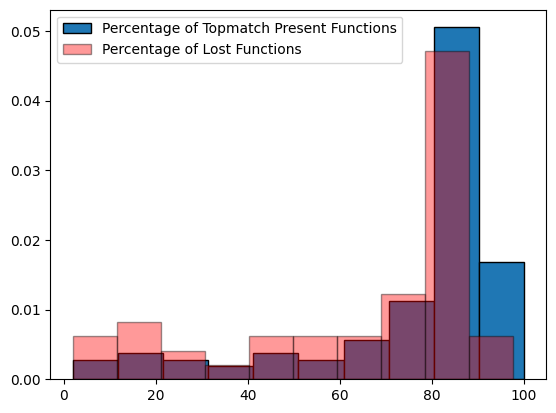

In [ ]:
plt.hist(present_array, density=True, edgecolor = 'black', label = 'Percentage of Topmatch Present Functions')
plt.hist(lost_array,color='red', density=True, alpha = 0.4, edgecolor = 'black', label = 'Percentage of Lost Functions')
# plt.plot(x2, density2, color = 'red', label = 'Gaussian KDE of Present')
plt.legend()